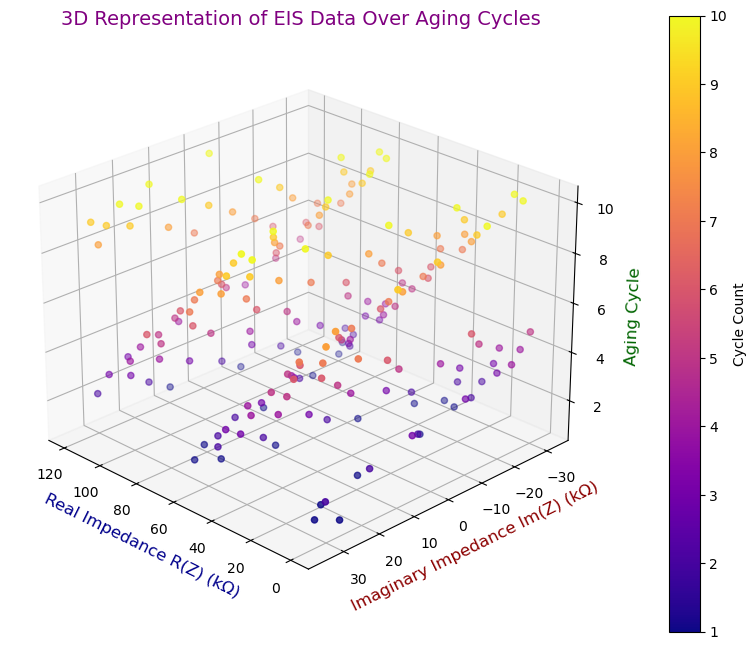

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Setting a seed for reproducibility
np.random.seed(42)

# Defining simulation parameters
cycles = np.arange(1, 11)  # Representing 10 aging cycles
data_points = 20  # Number of impedance readings per cycle

# Generating synthetic values for impedance measurements
real_impedance = np.linspace(0, 120, data_points)  # Simulated R(Z) values
imag_impedance = [
    30 * np.sin(0.1 * real_impedance + cycle) + np.random.normal(0, 2, data_points) 
    for cycle in cycles
]

# Structuring data for 3D visualization
RZ_values = np.tile(real_impedance, len(cycles))
IMZ_values = np.concatenate(imag_impedance)
cycle_counts = np.repeat(cycles, data_points)

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with a new color mapping (plasma colormap)
scatter = ax.scatter(RZ_values, IMZ_values, cycle_counts, c=cycle_counts, cmap='plasma', marker='o')

# Labeling axes and title
ax.set_xlabel('Real Impedance R(Z) (kΩ)', fontsize=12, color='darkblue')
ax.set_ylabel('Imaginary Impedance Im(Z) (kΩ)', fontsize=12, color='darkred')
ax.set_zlabel('Aging Cycle', fontsize=12, color='darkgreen')
ax.set_title('3D Representation of EIS Data Over Aging Cycles', fontsize=14, color='purple')

# Adding a color bar for reference
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cycle Count', color='black')
cbar.ax.yaxis.set_tick_params(color='black')

# Adjusting the viewing angle for better visualization
ax.view_init(elev=25, azim=135)

# Show the plot
plt.show()

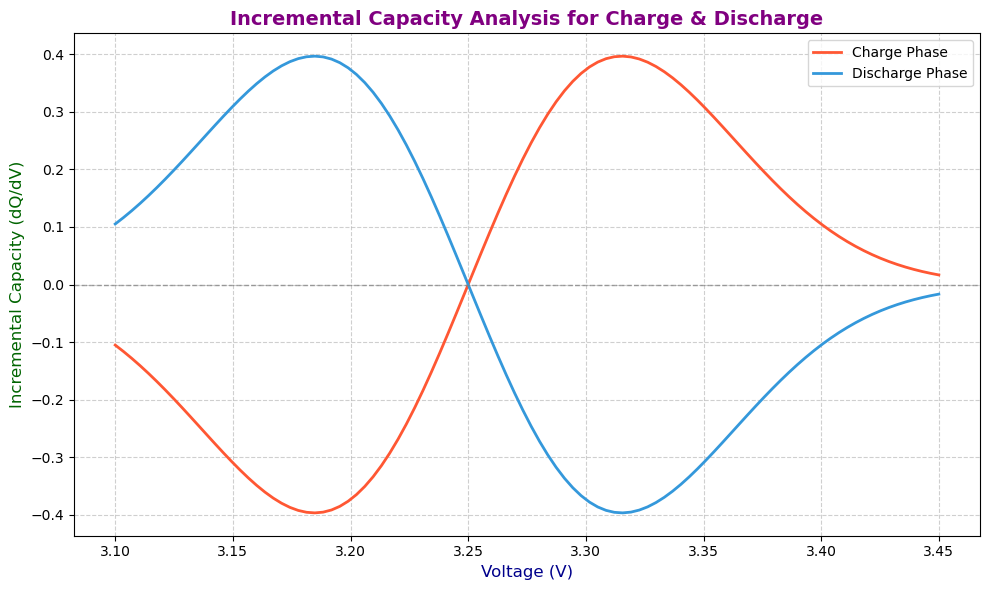

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic Incremental Capacity (dQ/dV) data
def simulate_ica(voltage_min, voltage_max, points, peak_location, intensity, spread):
    voltage_range = np.linspace(voltage_min, voltage_max, points)
    incremental_capacity = intensity * np.sin(10 * (voltage_range - peak_location)) * np.exp(-(voltage_range - peak_location) ** 2 / spread)
    return voltage_range, incremental_capacity

# Generate ICA curves for both charging and discharging phases
voltage_charging, capacity_charging = simulate_ica(3.1, 3.45, 100, 3.25, 1, 0.01)
voltage_discharging, capacity_discharging = simulate_ica(3.1, 3.45, 100, 3.25, -1, 0.01)

# Create a 2D plot for ICA
plt.figure(figsize=(10, 6))
plt.plot(voltage_charging, capacity_charging, label="Charge Phase", color='#FF5733', linewidth=2)  # Orange-red
plt.plot(voltage_discharging, capacity_discharging, label="Discharge Phase", color='#3498DB', linewidth=2)  # Deep blue
plt.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.7)  # Dashed reference line at y=0

# Labeling and styling
plt.xlabel("Voltage (V)", fontsize=12, color='darkblue')
plt.ylabel("Incremental Capacity (dQ/dV)", fontsize=12, color='darkgreen')
plt.title("Incremental Capacity Analysis for Charge & Discharge", fontsize=14, weight='bold', color='purple')
plt.legend(fontsize=10, loc='best')
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and display
plt.tight_layout()
plt.show()

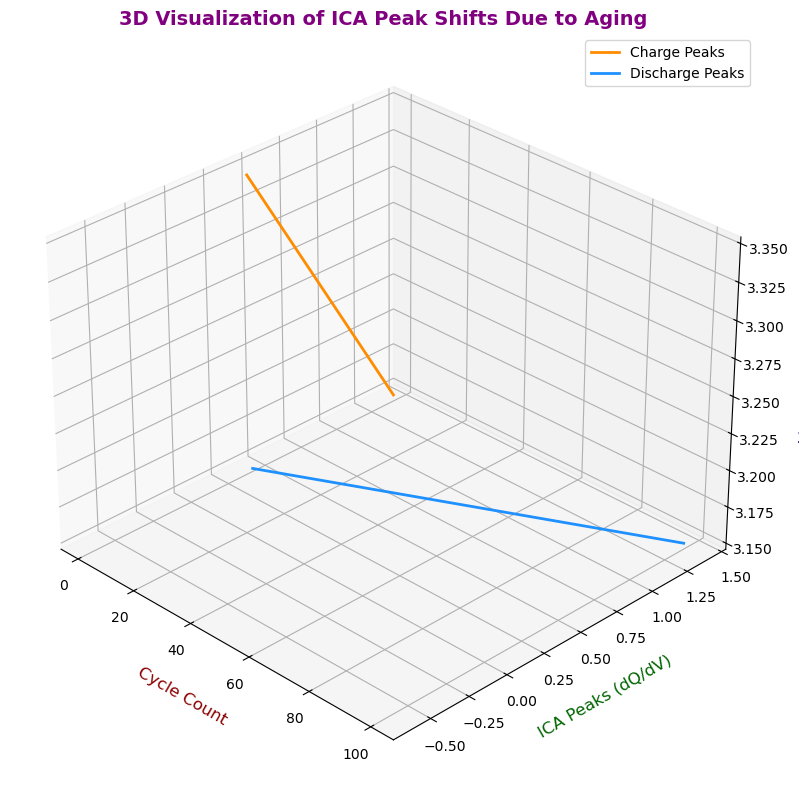

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to model the impact of aging on ICA peak values
def model_aging_trend(ica_data, total_cycles, shift_per_cycle):
    peak_value = np.max(ica_data) if np.max(ica_data) > 0 else np.min(ica_data)
    return [peak_value - (cycle * shift_per_cycle) for cycle in range(total_cycles)]

# Define simulation parameters
num_cycles = np.arange(1, 101)  # Simulating up to 100 charge-discharge cycles
charge_peaks = model_aging_trend(capacity_charging, 100, 0.01)  # Gradual decline in charge peaks
discharge_peaks = model_aging_trend(capacity_discharging, 100, -0.01)  # Gradual rise in discharge peaks

# Create a 3D plot for ICA peak evolution over cycles
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot ICA peak trends for both charge and discharge
ax.plot(num_cycles, charge_peaks, zs=3.35, zdir='z', label="Charge Peaks", color='#FF8C00', linewidth=2)  # Dark orange
ax.plot(num_cycles, discharge_peaks, zs=3.15, zdir='z', label="Discharge Peaks", color='#1E90FF', linewidth=2)  # Dodger blue

# Customizing the 3D visualization
ax.set_xlabel("Cycle Count", fontsize=12, color='darkred', labelpad=10)
ax.set_ylabel("ICA Peaks (dQ/dV)", fontsize=12, color='darkgreen', labelpad=10)
ax.set_zlabel("Voltage (V)", fontsize=12, color='darkblue', labelpad=10)
ax.set_title("3D Visualization of ICA Peak Shifts Due to Aging", fontsize=14, weight='bold', color='purple')

# Adjust the viewing angle and styling
ax.view_init(elev=30, azim=-45)  # Adjust perspective
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=10, loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimal Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error (MSE): 1.2119
Mean Absolute Error (MAE): 0.8954
R-squared Score (R²): 0.9767
   Index                                           Features  Actual Capacity  \
0      0  {'Real Impedance (R(Z))': 77.19458621308237, '...        34.123634   
1      1  {'Real Impedance (R(Z))': 97.8553714145801, 'I...        29.129595   
2      2  {'Real Impedance (R(Z))': 8.54263781522748, 'I...        49.831942   
3      3  {'Real Impedance (R(Z))': 29.04663258138005, '...        43.178298   
4      4  {'Real Impedance (R(Z))': 108.90797687113117, ...        28.417753   

   Predicted Capacity     Error  
0           33.010536  1.113098  
1           27.925498  1.204097  
2           48.201632  1.630310  
3           43.299057 -0.120758  
4           27.757170  0.660582  


D:\anaa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
D:\anaa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
D:\anaa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
D:\anaa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
D:\anaa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


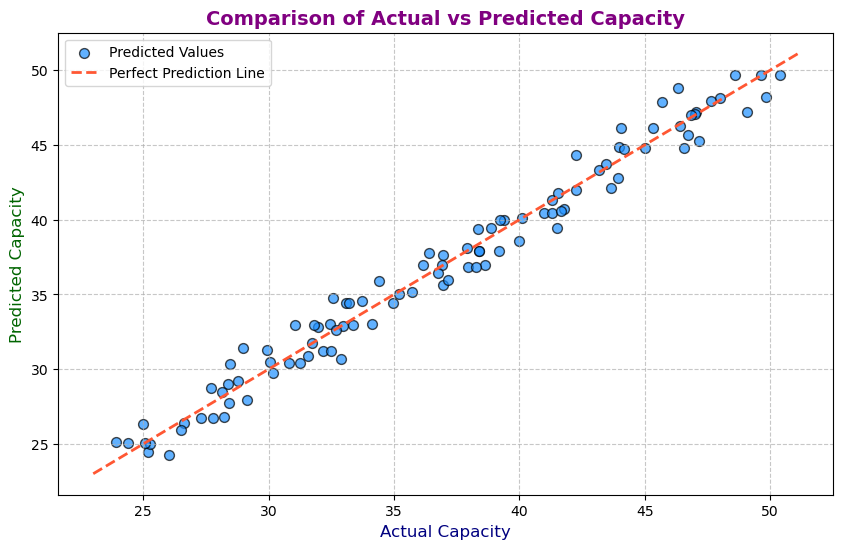

Final Model Evaluation:
Root Mean Squared Error (RMSE): 1.1009
Mean Absolute Error (MAE): 0.8954


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)
num_samples = 500

# Generate synthetic data for EIS signature and current capacity
real_impedance = np.random.uniform(0, 120, num_samples)  # Real part of impedance (kΩ)
imag_impedance = np.random.uniform(0, 40, num_samples)   # Imaginary part of impedance (kΩ)

# Simulate battery capacity using a linear equation with noise
current_capacity = (
    50 - 0.2 * real_impedance - 0.1 * imag_impedance + np.random.normal(0, 1, num_samples)
)

# Construct a DataFrame
dataset = pd.DataFrame({
    "Real Impedance (R(Z))": real_impedance,
    "Imaginary Impedance (Im(Z))": imag_impedance,
    "Current Capacity": current_capacity
})

# Define features and target variable
X = dataset[["Real Impedance (R(Z))", "Imaginary Impedance (Im(Z))"]]
y = dataset["Current Capacity"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize and tune the model using grid search
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1
)
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_
print(f"Optimal Hyperparameters: {grid_search.best_params_}")

# Generate predictions
y_pred = best_model.predict(X_test)

# Compute performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")

# Display a few example predictions
sample_results = []
for i in range(min(5, len(X_test))):
    sample_features = X_test.iloc[i]
    actual_value = y_test.iloc[i]
    predicted_value = best_model.predict([sample_features])[0]
    
    sample_results.append({
        "Index": i,
        "Features": sample_features.to_dict(),
        "Actual Capacity": actual_value,
        "Predicted Capacity": predicted_value,
        "Error": actual_value - predicted_value
    })

# Convert to DataFrame and display
sample_results_df = pd.DataFrame(sample_results)
print(sample_results_df)

# Visualization: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='#1E90FF', edgecolor='black', s=50, label="Predicted Values")  # Dodger Blue
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='#FF5733', linestyle='--', linewidth=2, label="Perfect Prediction Line")  # Red-Orange
plt.xlabel("Actual Capacity", fontsize=12, color='navy')
plt.ylabel("Predicted Capacity", fontsize=12, color='darkgreen')
plt.title("Comparison of Actual vs Predicted Capacity", fontsize=14, weight='bold', color='purple')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Display additional evaluation metrics
print("Final Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


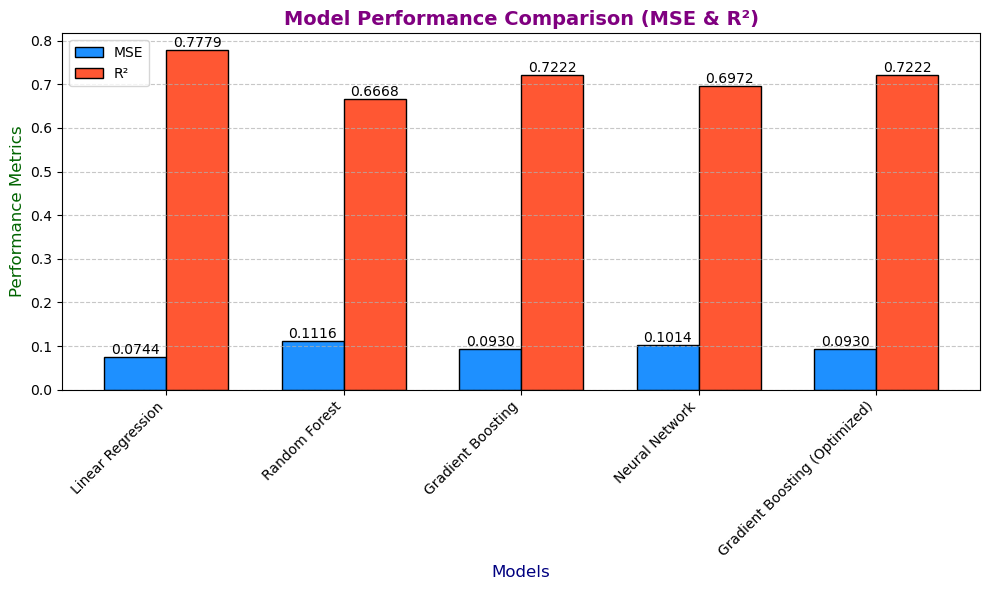


Cross-Validation Results:
Linear Regression Cross-Validation MSE: 0.0859 ± 0.0042
Random Forest Cross-Validation MSE: 0.1334 ± 0.0113
Gradient Boosting Cross-Validation MSE: 0.1184 ± 0.0029
Neural Network Cross-Validation MSE: 0.1205 ± 0.0096


['optimized_gradient_boosting_model.pkl']

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset (Replace with actual data)
num_samples = 1000
num_features = 10
X = np.random.rand(num_samples, num_features)
y = X @ np.random.rand(num_features) + np.random.rand(num_samples)  # Linear relationship with noise

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize feature values for improved model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with default configurations
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

# Train and evaluate models using test data
performance_metrics = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    performance_metrics[model_name] = {'MSE': mse, 'R²': r2}

# Hyperparameter optimization for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gbr, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Evaluate the optimized Gradient Boosting model
best_gbr = grid_search.best_estimator_
best_gbr_predictions = best_gbr.predict(X_test_scaled)
performance_metrics['Gradient Boosting (Optimized)'] = {
    'MSE': mean_squared_error(y_test, best_gbr_predictions),
    'R²': r2_score(y_test, best_gbr_predictions)
}

# Compare models using bar plots
model_names = list(performance_metrics.keys())
mse_values = [metrics['MSE'] for metrics in performance_metrics.values()]
r2_values = [metrics['R²'] for metrics in performance_metrics.values()]

# Visualization of model performance
x_positions = np.arange(len(model_names))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Updated color scheme for better distinction
bars_mse = ax.bar(x_positions - bar_width/2, mse_values, bar_width, label='MSE', color='#1E90FF', edgecolor='black')  # Dodger blue
bars_r2 = ax.bar(x_positions + bar_width/2, r2_values, bar_width, label='R²', color='#FF5733', edgecolor='black')  # Red-Orange

# Labeling and styling
ax.set_xlabel('Models', fontsize=12, color='navy')
ax.set_ylabel('Performance Metrics', fontsize=12, color='darkgreen')
ax.set_title('Model Performance Comparison (MSE & R²)', fontsize=14, weight='bold', color='purple')
ax.set_xticks(x_positions)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Annotate bars with exact values
for bars in [bars_mse, bars_r2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Perform cross-validation for additional evaluation
print("\nCross-Validation Results:")
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{model_name} Cross-Validation MSE: {-np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Save the optimized Gradient Boosting model
joblib.dump(best_gbr, 'optimized_gradient_boosting_model.pkl')

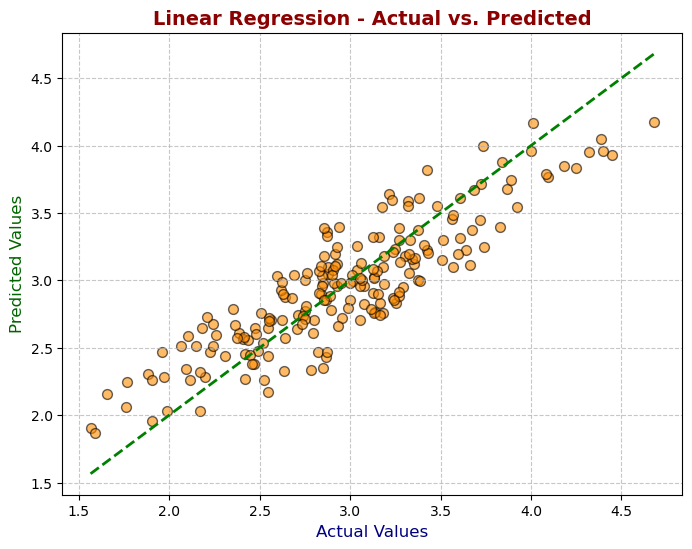

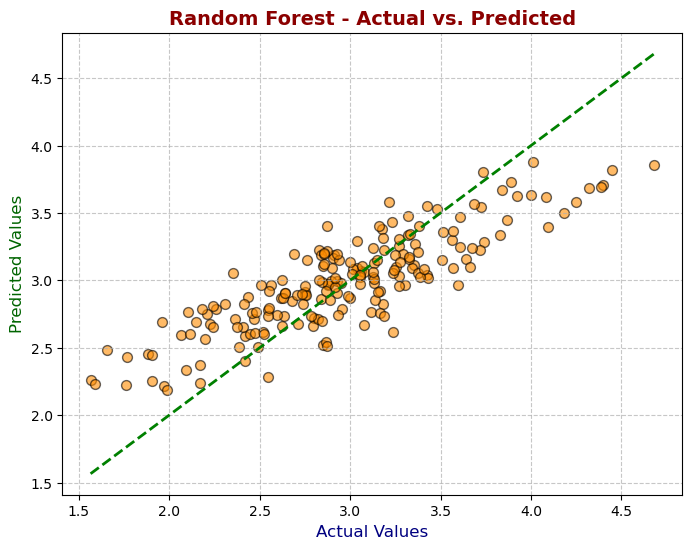

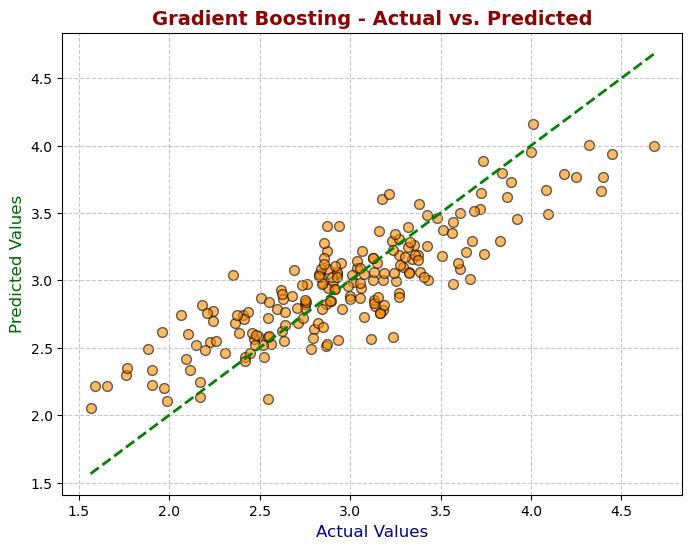

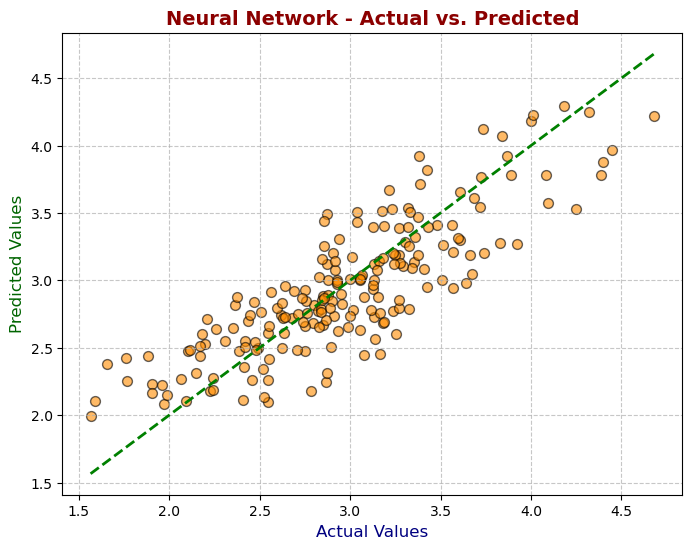

In [7]:
import matplotlib.pyplot as plt

def visualize_predictions(y_true, y_predicted, model_label):
    """
    Displays a scatter plot comparing actual vs. predicted values for a given model.

    Parameters:
    - y_true: Array of actual values
    - y_predicted: Array of predicted values
    - model_label: Name of the model for labeling the plot
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_predicted, alpha=0.6, color='darkorange', edgecolor='black', s=50)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'green', linestyle='--', lw=2)  # Reference line
    plt.title(f"{model_label} - Actual vs. Predicted", fontsize=14, weight='bold', color='darkred')
    plt.xlabel("Actual Values", fontsize=12, color='navy')
    plt.ylabel("Predicted Values", fontsize=12, color='darkgreen')
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()

# Generate scatter plots for each trained model
for model_name, model_instance in models.items():
    predicted_values = model_instance.predict(X_test_scaled)
    visualize_predictions(y_test, predicted_values, model_name)

In [8]:
import pandas as pd
import ast
from datetime import datetime
import numpy as np
import plotly.graph_objects as go
import plotly.io as pi

In [9]:
metadata_path = "D:\\proj\\archive (3)\\cleaned_dataset\\metadata.csv"
metadata_df = pd.read_csv(metadata_path)
metadata_df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [10]:
print(metadata_df.columns)


Index(['type', 'start_time', 'ambient_temperature', 'battery_id', 'test_id',
       'uid', 'filename', 'Capacity', 'Re', 'Rct'],
      dtype='object')


In [11]:
impedance_df = metadata_df[metadata_df['type'] == 'impedance'][['start_time', 'Re', 'Rct', 'battery_id']]
dataset_df = metadata_df[metadata_df['type'] == 'impedance'][['start_time', 'filename', 'battery_id']]

In [12]:
from datetime import datetime

def parse_start_time(value):
    try:
        if isinstance(value, str):
            value = value.strip("[]").replace(",", "")
            components = [float(x) for x in value.split()]
            if len(components) == 6:
                year, month, day, hour, minute = map(int, components[:5])
                second = int(components[5])
                return datetime(year, month, day, hour, minute, second)
    except (ValueError, SyntaxError, TypeError):
        return pd.NaT
    return pd.NaT

In [13]:
dataset_df['start_time'] = dataset_df['start_time'].apply(parse_start_time)
impedance_df['start_time'] = impedance_df['start_time'].apply(parse_start_time)

# Dropping null values and sorting based on start time 
impedance_df = impedance_df.dropna(subset=['start_time'])
impedance_df = impedance_df.sort_values(by='start_time')

dataset_df = dataset_df.dropna(subset=['start_time'])
dataset_df = dataset_df.sort_values(by='start_time')
impedance_df['battery_id'].unique()

array(['B0005', 'B0007', 'B0006', 'B0018', 'B0028', 'B0027', 'B0025',
       'B0026', 'B0029', 'B0031', 'B0030', 'B0032', 'B0036', 'B0034',
       'B0033', 'B0039', 'B0038', 'B0040', 'B0043', 'B0044', 'B0042',
       'B0041', 'B0047', 'B0045', 'B0046', 'B0048', 'B0052', 'B0049',
       'B0050', 'B0051', 'B0054', 'B0056', 'B0055', 'B0053'], dtype=object)

In [14]:
for battery_id in impedance_df['battery_id'].unique() :
    current_battery_info = impedance_df[impedance_df['battery_id'] == battery_id]
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=current_battery_info['start_time'], 
        y=current_battery_info['Re'], 
        mode='lines', 
        name='Re',
        line=dict(color='green')
    ))
    fig.add_trace(go.Scatter(
        x=current_battery_info['start_time'], 
        y=current_battery_info['Rct'], 
        mode='lines', 
        name='Rct',
        line=dict(color='blue')
    ))
    fig.update_layout(
        title=f"Resistance Battery id {battery_id}",
        xaxis_title="Start Time",
        yaxis_title="Resistance (Ohms)",
        xaxis=dict(tickangle=0),
        legend_title="Legend",
        template="plotly"
    )
    import plotly.io as pi
    pi.renderers.default = 'iframe_connected'
    fig.show()

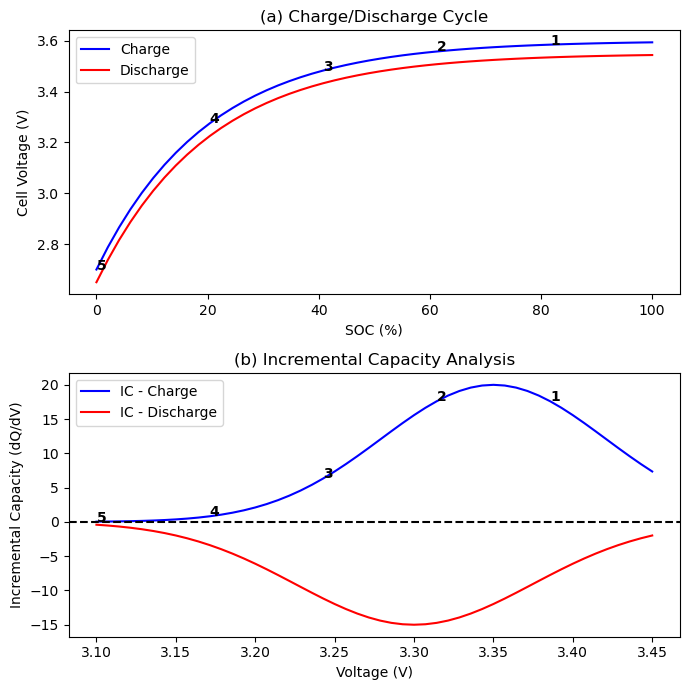

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data points (approximated from the given image)
soc = np.linspace(0, 100, 50)
voltage_charge = 2.7 + 0.9 * (1 - np.exp(-0.05 * soc))  # Simulating charge curve
voltage_discharge = voltage_charge - 0.05  # Simulating discharge curve

voltage = np.linspace(3.1, 3.45, 50)
dq_dv_charge = 20 * np.exp(-100 * (voltage - 3.35)**2)  # Simulating peaks for incremental capacity
dq_dv_discharge = -15 * np.exp(-90 * (voltage - 3.3)**2)

# Creating the figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(7, 7))

# Plot (a) - Charge/Discharge Curve
axs[0].plot(soc, voltage_charge, 'b-', label="Charge")
axs[0].plot(soc, voltage_discharge, 'r-', label="Discharge")
axs[0].set_xlabel("SOC (%)")
axs[0].set_ylabel("Cell Voltage (V)")
axs[0].legend()
axs[0].set_title("(a) Charge/Discharge Cycle")

# Annotating points
for i, txt in enumerate([5, 4, 3, 2, 1]):
    axs[0].annotate(txt, (soc[i*10], voltage_charge[i*10]), fontsize=10, color='black', weight='bold')

# Plot (b) - Incremental Capacity Analysis
axs[1].plot(voltage, dq_dv_charge, 'b-', label="IC - Charge")
axs[1].plot(voltage, dq_dv_discharge, 'r-', label="IC - Discharge")
axs[1].axhline(0, color='black', linestyle="--")
axs[1].set_xlabel("Voltage (V)")
axs[1].set_ylabel("Incremental Capacity (dQ/dV)")
axs[1].legend()
axs[1].set_title("(b) Incremental Capacity Analysis")

# Annotating points
for i, txt in enumerate([5, 4, 3, 2, 1]):
    axs[1].annotate(txt, (voltage[i*10], dq_dv_charge[i*10]), fontsize=10, color='black', weight='bold')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
# Simulate charge/discharge data
np.random.seed(42)
voltage = np.linspace(3.0, 4.2, 100)  # Voltage range from 3.0V to 4.2V
capacity = np.sin(2 * np.pi * voltage) + np.random.normal(0, 0.1, 100)  # Simulated capacity

# Create DataFrame
df = pd.DataFrame({
    'Voltage (V)': voltage,
    'Capacity (Ah)': capacity
})

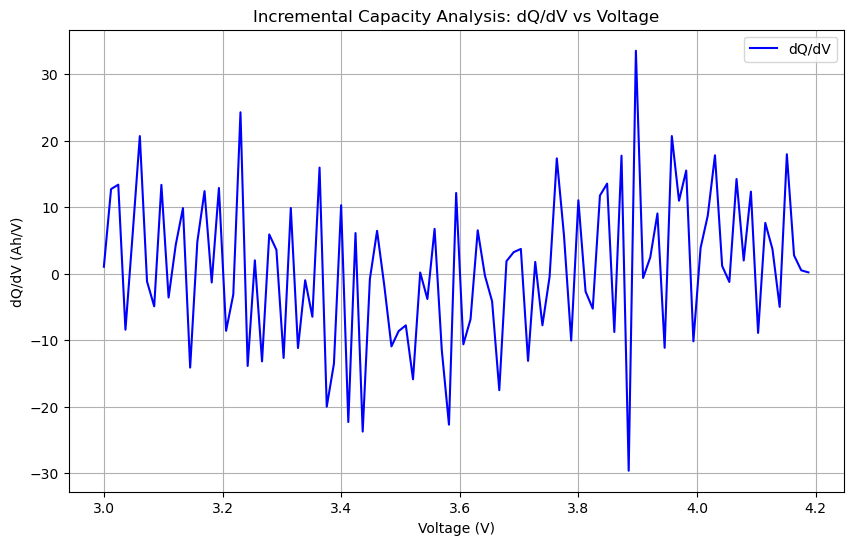

In [23]:
# Calculate dQ/dV
dQ = np.diff(df['Capacity (Ah)'])
dV = np.diff(df['Voltage (V)'])
dQ_dV = dQ / dV

# Plot dQ/dV vs Voltage
plt.figure(figsize=(10, 6))
plt.plot(df['Voltage (V)'][:-1], dQ_dV, label='dQ/dV', color='blue')
plt.xlabel('Voltage (V)')
plt.ylabel('dQ/dV (Ah/V)')
plt.title('Incremental Capacity Analysis: dQ/dV vs Voltage')
plt.legend()
plt.grid()
plt.savefig('incremental_capacity_analysis.png')
plt.show()

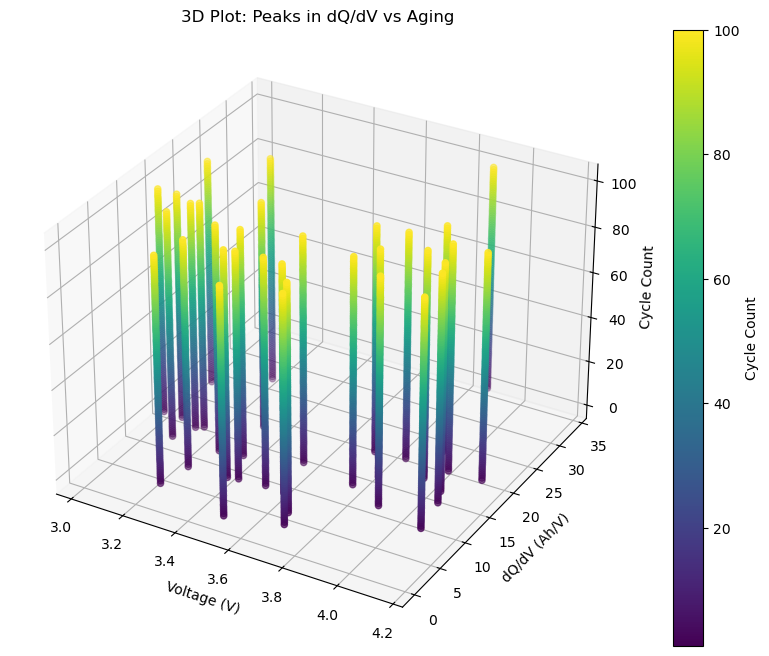

In [24]:
# Simulate aging data (cycle count)
cycle_count = np.arange(1, 101)  # 100 cycles
peaks_voltage = []
peaks_dQ_dV = []
cycle_counts = []

for cycle in cycle_count:
    # Simulate peaks for each cycle
    dQ_dV_cycle = dQ_dV + np.random.normal(0, 0.01, len(dQ_dV))  # Add noise for simulation
    peaks, _ = find_peaks(dQ_dV_cycle, height=0)
    peaks_voltage.extend(df['Voltage (V)'][peaks])
    peaks_dQ_dV.extend(dQ_dV_cycle[peaks])
    cycle_counts.extend([cycle] * len(peaks))

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(peaks_voltage, peaks_dQ_dV, cycle_counts, c=cycle_counts, cmap='viridis')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('dQ/dV (Ah/V)')
ax.set_zlabel('Cycle Count')
ax.set_title('3D Plot: Peaks in dQ/dV vs Aging')
plt.colorbar(ax.collections[0], label='Cycle Count')
plt.savefig('3d_peaks_vs_aging.png')
plt.show()

Mean Squared Error: 0.1352


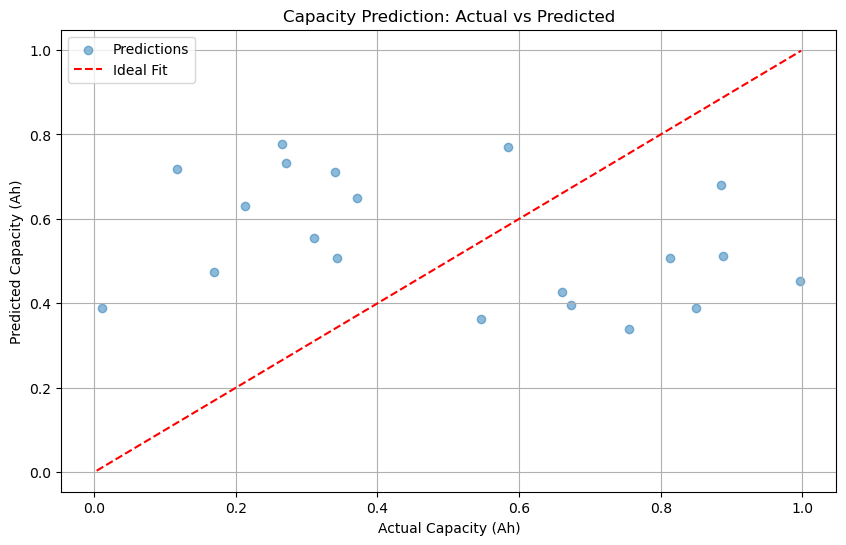

In [25]:
# Simulate EIS signature data
r_z = np.random.uniform(0, 120, 100)  # Real part of impedance
im_z = np.random.uniform(0, 40, 100)  # Imaginary part of impedance
capacity = np.random.uniform(0, 1, 100)  # Simulated capacity

# Prepare data for machine learning
X = np.column_stack((r_z, im_z))
y = capacity

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict capacity
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Capacity (Ah)')
plt.ylabel('Predicted Capacity (Ah)')
plt.title('Capacity Prediction: Actual vs Predicted')
plt.legend()
plt.grid()
plt.savefig('capacity_prediction.png')
plt.show()